In [102]:
import pandas as pd
pd.options.display.max_columns = 200

trades = pd.read_csv("historical_data.csv", low_memory=False)
sent  = pd.read_csv("fear_greed_index.csv", low_memory=False)

print("TRADES shape:", trades.shape)
print(trades.columns.tolist()[:40])
display(trades.head())

print("SENT shape:", sent.shape)
print(sent.columns.tolist())
display(sent.head())

TRADES shape: (211224, 16)
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


SENT shape: (2644, 4)
['timestamp', 'value', 'classification', 'date']


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [103]:
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [104]:
sent.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [105]:
trades.drop_duplicates(inplace=True)
sent.drop_duplicates(inplace=True)

In [106]:
def clean_cols(df):
    df = df.copy()
    df.columns = (
        df.columns.str.strip()
                  .str.lower()
                  .str.replace(" ", "_")
                  .str.replace("-", "_")
    )
    return df

trades = clean_cols(trades)
sent = clean_cols(sent)

trades.columns, sent.columns

(Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
        'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
        'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
        'timestamp'],
       dtype='object'),
 Index(['timestamp', 'value', 'classification', 'date'], dtype='object'))

In [107]:
trades['timestamp_ist'] = pd.to_datetime(trades['timestamp_ist'], errors='coerce')
trades = trades.dropna(subset=['timestamp_ist'])
trades['date'] = trades['timestamp_ist'].dt.date

In [108]:
trades['date']=pd.to_datetime(trades['date'])

In [109]:
start_date = trades['date'].min()
end_date   = trades['date'].max()

print("Trades date range:", start_date, "to", end_date)

Trades date range: 2023-01-05 00:00:00 to 2025-12-04 00:00:00


In [110]:
sent["date"]=pd.to_datetime(sent["date"])

In [111]:
sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [112]:
print(sent[sent['date'].isna()])

Empty DataFrame
Columns: [timestamp, value, classification, date]
Index: []


In [113]:
sent_overlap = sent[(sent['date'] >= start_date) & (sent['date'] <= end_date)]
print("Sentiment overlap range:", sent_overlap['date'].min(), "to", sent_overlap['date'].max())

Sentiment overlap range: 2023-01-05 00:00:00 to 2025-05-02 00:00:00


In [114]:
print("Sentiment missing values:\n", sent.isnull().sum())
print("Trades missing values:\n", trades.isnull().sum())

sent['classification'] = sent['classification'].fillna("Unknown")

trades['execution_price'] = pd.to_numeric(trades['execution_price'], errors='coerce')
trades['size_usd'] = pd.to_numeric(trades['size_usd'], errors='coerce')
trades['closed_pnl'] = pd.to_numeric(trades['closed_pnl'], errors='coerce')
trades['fee'] = pd.to_numeric(trades['fee'], errors='coerce')

trades['closed_pnl'] = trades['closed_pnl'].fillna(0)
trades['size_usd'] = trades['size_usd'].fillna(0)

Sentiment missing values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64
Trades missing values:
 account             0
coin                0
execution_price     0
size_tokens         0
size_usd            0
side                0
timestamp_ist       0
start_position      0
direction           0
closed_pnl          0
transaction_hash    0
order_id            0
crossed             0
fee                 0
trade_id            0
timestamp           0
date                0
dtype: int64


In [115]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79225 entries, 0 to 210649
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   account           79225 non-null  object        
 1   coin              79225 non-null  object        
 2   execution_price   79225 non-null  float64       
 3   size_tokens       79225 non-null  float64       
 4   size_usd          79225 non-null  float64       
 5   side              79225 non-null  object        
 6   timestamp_ist     79225 non-null  datetime64[ns]
 7   start_position    79225 non-null  float64       
 8   direction         79225 non-null  object        
 9   closed_pnl        79225 non-null  float64       
 10  transaction_hash  79225 non-null  object        
 11  order_id          79225 non-null  int64         
 12  crossed           79225 non-null  bool          
 13  fee               79225 non-null  float64       
 14  trade_id          79225 no

In [116]:
merged = trades.merge(sent[['date','classification','value']], on='date', how='left')

merged['sentiment_simple'] = merged['classification'].fillna('neutral').str.lower().apply(
    lambda x: "fear" if "fear" in x else ("greed" if "greed" in x else "neutral")
)

In [117]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79225 entries, 0 to 79224
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   account           79225 non-null  object        
 1   coin              79225 non-null  object        
 2   execution_price   79225 non-null  float64       
 3   size_tokens       79225 non-null  float64       
 4   size_usd          79225 non-null  float64       
 5   side              79225 non-null  object        
 6   timestamp_ist     79225 non-null  datetime64[ns]
 7   start_position    79225 non-null  float64       
 8   direction         79225 non-null  object        
 9   closed_pnl        79225 non-null  float64       
 10  transaction_hash  79225 non-null  object        
 11  order_id          79225 non-null  int64         
 12  crossed           79225 non-null  bool          
 13  fee               79225 non-null  float64       
 14  trade_id          7922

In [133]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, kruskal
import statsmodels.formula.api as smf

In [120]:
merged['closed_pnl'] = pd.to_numeric(merged['closed_pnl'], errors='coerce')
merged['size_usd'] = pd.to_numeric(merged['size_usd'], errors='coerce')

In [121]:
merged['is_profit'] = (merged['closed_pnl'] > 0).astype(int)

In [122]:
print(merged.groupby('classification')['closed_pnl'].agg(['mean','median','std','count']))
print(merged.groupby('classification')['is_profit'].mean())

                      mean   median          std  count
classification                                         
Extreme Fear      1.891632  0.00000    76.727713   2326
Extreme Greed   205.816345  0.96048  1861.557119   5621
Fear            128.287950  0.00000  1342.348497  13869
Greed            53.988003  0.00000  1399.468182  11292
Neutral          27.088803  0.00000   142.945889   2756
classification
Extreme Fear     0.292777
Extreme Greed    0.553282
Fear             0.381787
Greed            0.435707
Neutral          0.494920
Name: is_profit, dtype: float64


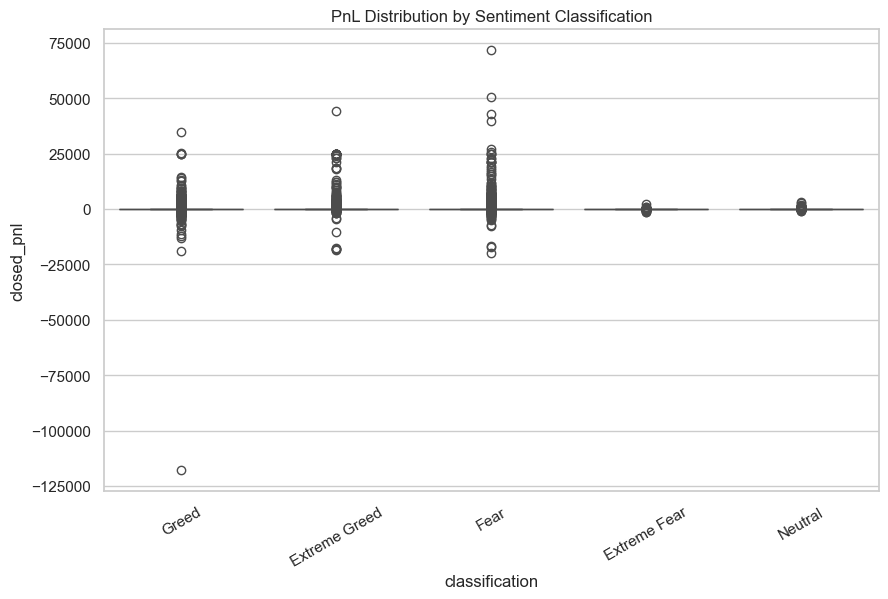

In [123]:
sns.boxplot(x='classification', y='closed_pnl', data=merged)
plt.title("PnL Distribution by Sentiment Classification")
plt.xticks(rotation=30)
plt.show()

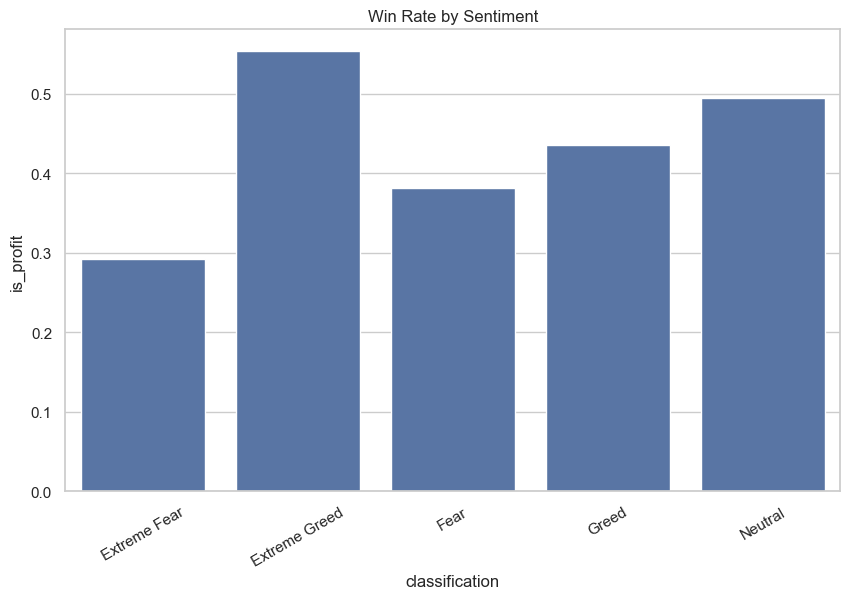

In [124]:
win_rate = merged.groupby('classification')['is_profit'].mean().reset_index()
sns.barplot(x='classification', y='is_profit', data=win_rate)
plt.title("Win Rate by Sentiment")
plt.xticks(rotation=30)
plt.show()

In [125]:
groups = [grp["closed_pnl"].dropna().values for name, grp in merged.groupby("classification")]
stat, pval = kruskal(*groups)
print("Kruskal-Wallis test across all sentiment categories: stat=%.3f, p=%.4f" % (stat, pval))

Kruskal-Wallis test across all sentiment categories: stat=677.205, p=0.0000


In [127]:
fear = merged[merged['classification'].str.contains("Fear", case=False, na=False)]['closed_pnl'].dropna()
greed = merged[merged['classification'].str.contains("Greed", case=False, na=False)]['closed_pnl'].dropna()

from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(fear, greed, equal_var=False)
print("Fear vs Greed t-test: t=%.3f, p=%.4f" % (t_stat, p_val))


Fear vs Greed t-test: t=0.366, p=0.7142


In [134]:
extreme_fear = merged[merged['classification'].str.contains("Extreme Fear", na=False)]['closed_pnl'].dropna()
extreme_greed = merged[merged['classification'].str.contains("Extreme Greed", na=False)]['closed_pnl'].dropna()

t_stat, p_val = ttest_ind(extreme_fear, extreme_greed, equal_var=False)
print("T-test Extreme Fear vs Extreme Greed:", t_stat, p_val)

T-test Extreme Fear vs Extreme Greed: -8.196163890563682 3.0416288768450753e-16


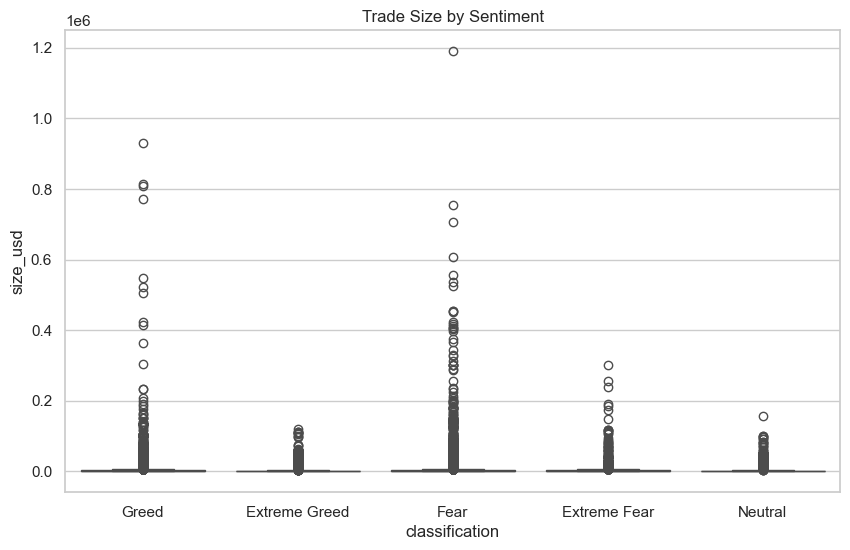

In [128]:
sns.boxplot(x='classification', y='size_usd', data=merged)
plt.title("Trade Size by Sentiment")
plt.show()

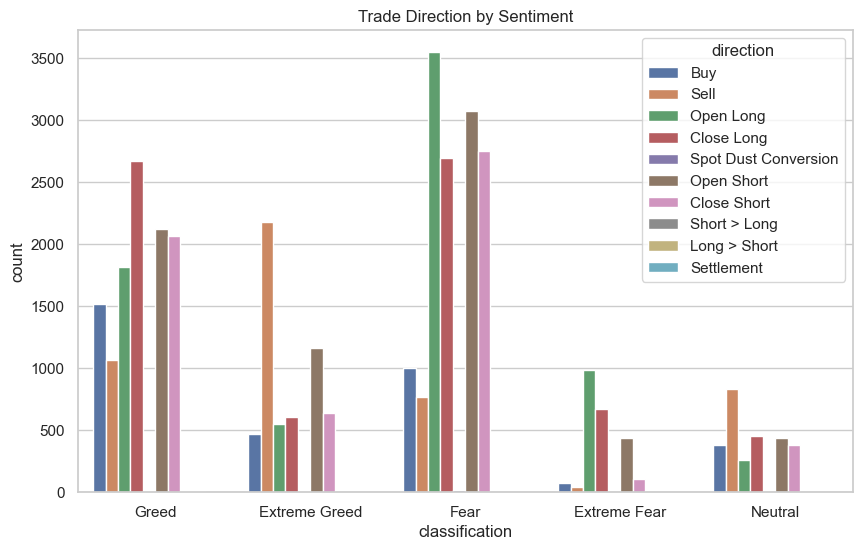

In [130]:
sns.countplot(x='classification', hue='direction', data=merged)
plt.title("Trade Direction by Sentiment")
plt.show()

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     13701
           1       0.85      1.00      0.92     10067

    accuracy                           0.92     23768
   macro avg       0.92      0.93      0.92     23768
weighted avg       0.94      0.92      0.93     23768

ROC AUC: 0.9445932854212228


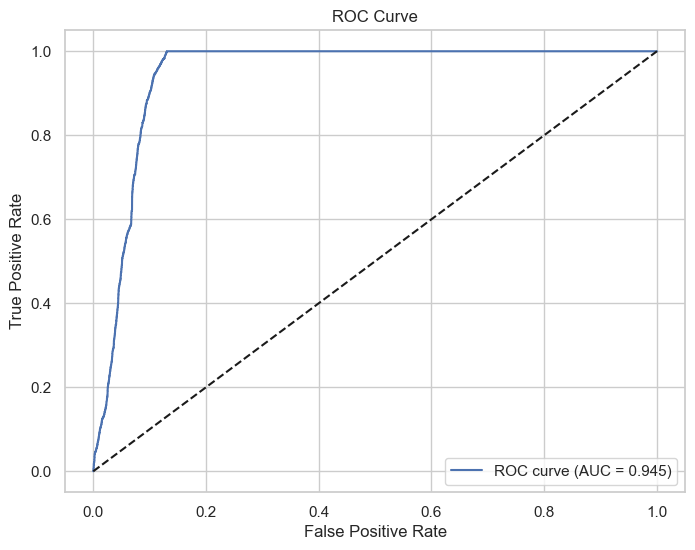

Feature importance (sorted by absolute effect):
                           feature  coefficient
3             direction_Close Long     6.866920
4            direction_Close Short     6.491337
8                   direction_Sell     6.312458
10          direction_Short > Long     6.276815
7             direction_Open Short    -4.148728
5           direction_Long > Short     4.107707
6              direction_Open Long    -3.923312
1           sentiment_simple_greed     0.214346
11  direction_Spot Dust Conversion    -0.204208
2         sentiment_simple_neutral    -0.071394
0                         size_usd    -0.032413
9             direction_Settlement    -0.006021


In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

merged['is_profit'] = (merged['closed_pnl'] > 0).astype(int)

features = ['sentiment_simple', 'size_usd', 'direction']
X = merged[features].copy()
y = merged['is_profit'].copy()

X = X.dropna()
y = y.loc[X.index]

X_encoded = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
if 'size_usd' in X_encoded.columns:
    X_encoded['size_usd'] = scaler.fit_transform(X_encoded[['size_usd']])

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

clf = LogisticRegression(max_iter=5000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'coefficient': clf.coef_[0]
}).sort_values(by='coefficient', key=abs, ascending=False)

print("Feature importance (sorted by absolute effect):")
print(importance)
